In [2]:
import numpy as np
import matplotlib.pyplot as plt


In [64]:
def S(r1, r, theta):
    return np.sqrt(r1**2 + r**2 - 2*r1*r* np.cos(theta))

def dS(r1, r, theta, dr, dr1, dtheta):
    num = r1 * dr1 + r * dr - dr1 * r * np.cos(theta) - r1 * dr * np.cos(theta) + r1 * r * np.sin(theta) * dtheta
    denom = S(r1, r, theta)
    return num/denom

S = np.vectorize(S)

In [5]:
def get_r_from_prob(num, r_min, r_max):
    c = np.random.uniform(0, 1, num)
    return np.sqrt(r_min**2 + c * (r_max**2 - r_min**2))

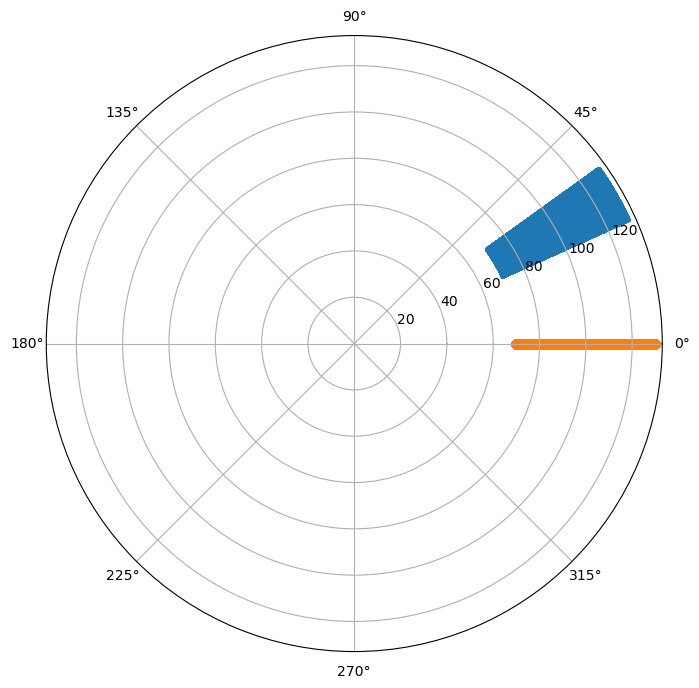

In [65]:
num = 1000000

r_mid = 100
del_r = 30
r_min = r_mid - del_r
r_max = r_mid + del_r

theta_mid = np.pi/6
del_theta = 0.1
theta_min = theta_mid - del_theta
theta_max = theta_mid + del_theta

r_val = get_r_from_prob(num, r_min, r_max)
r1_val = get_r_from_prob(num, r_min, r_max)
theta_val = np.random.uniform(theta_min, theta_max, num)

fig, ax = plt.subplots(figsize = (8,8), subplot_kw={'projection': 'polar'})
ax.scatter(theta_val, r1_val, s=1)
ax.scatter(np.zeros_like(r_val), r_val)

s bin width =  53.81717772183767


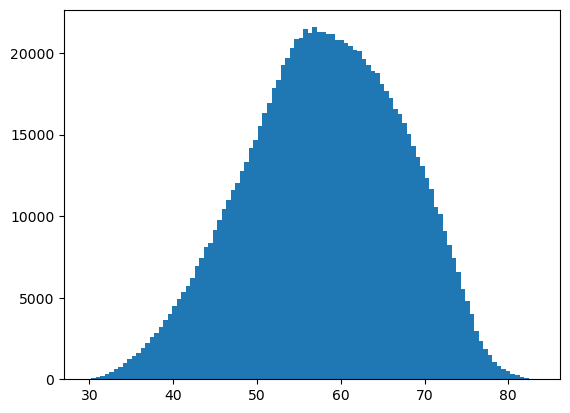

In [66]:
s_val = S(r1_val, r_val, theta_val)
plt.hist(s_val, bins=100);
print("s bin width = ", (np.max(s_val) - np.min(s_val)))

In [67]:
np.min(s_val)
ind = np.where(s_val == np.min(s_val))
print(r_val[ind], r1_val[ind], theta_val[ind])
print(np.min(theta_val))

[70.44292719] [70.04537285] [0.42560709]
0.4235988027618385


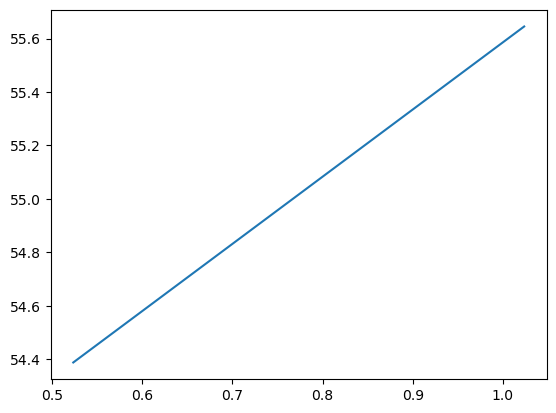

In [71]:
def s_bin_from_theta(theta, del_theta, r, del_r):
    theta_min = theta - del_theta
    theta_max = theta + del_theta

    r_min = r - del_r
    r_max = r + del_r

    s_min = 2 * r_min * np.sin(theta_min/2)
    s_max = np.sqrt(r_max**2 + r_min**2 - 2 * r_max * r_min * np.cos(theta_max))
    s_bin_width = s_max - s_min

    return s_bin_width

theta = np.arange(np.pi/6, np.pi/3, 0.5)
dtheta = 0.1
r = 100
del_r = 30

s_bin_widths = s_bin_from_theta(theta, dtheta, r, del_r)
plt.plot(theta, s_bin_widths)

### Wrong distribution

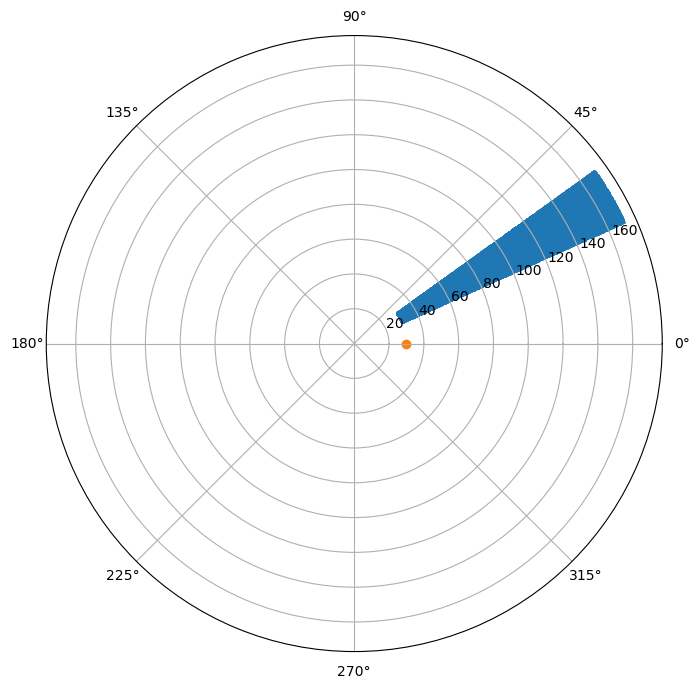

In [34]:
num = 100000

r_mid = 100
del_r = 70
r_min = r_mid - del_r
r_max = r_mid + del_r

theta_mid = np.pi/6
del_theta = 0.1
theta_min = theta_mid - del_theta
theta_max = theta_mid + del_theta

r_val = r_min
r1_val = np.random.uniform(r_min, r_max, num)
theta_val = np.random.uniform(theta_min, theta_max, num)

fig, ax = plt.subplots(figsize = (8,8), subplot_kw={'projection': 'polar'})
ax.scatter(theta_val, r1_val, s=1)
ax.scatter(0, r_val)

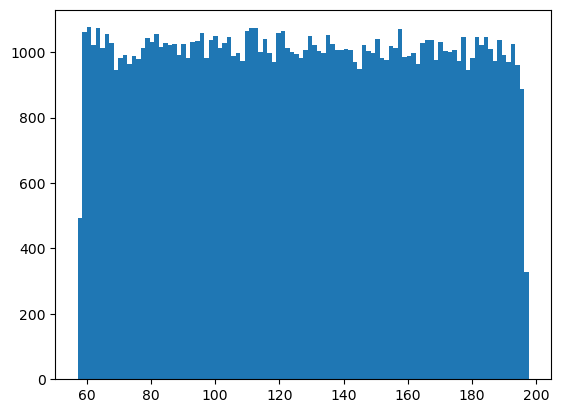

In [26]:
s_val = S(r1_val, r_val, theta_val)
plt.hist(s_val, bins=100);

## Curve fitting with variable fourier series

[ 3.14159265e+00 -1.44117166e-09 -2.60177497e-09  2.00000000e+00
 -1.12810330e-08 -1.50821648e-08 -7.46645947e-09  2.59867232e-09
 -8.77753588e-09  3.00000000e+00]


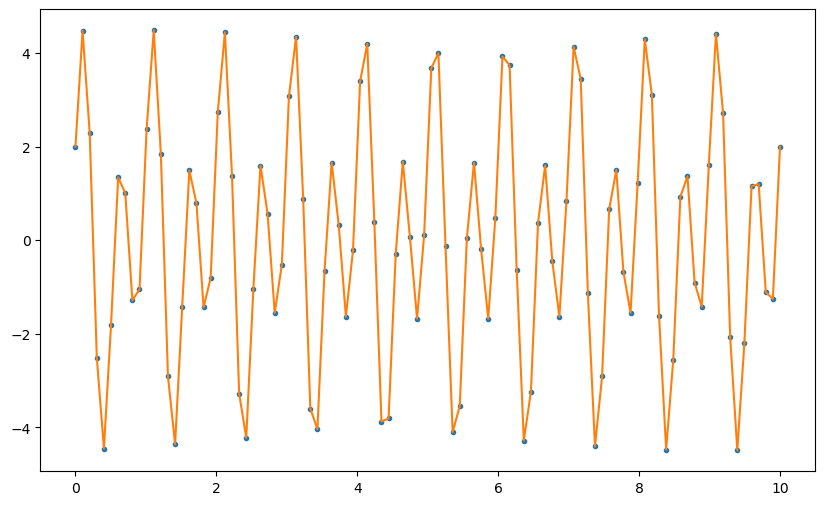

In [32]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

def fourier_series(x, w, a0, a1, a2, a3, a4, b1, b2, b3, b4):
    """Dynamically generated fitting function for Fourier series."""
    result = a0 + a1 * np.cos(w * x) + a2 * np.cos(2 * w * x) + a3 * np.cos(3 * w * x) \
                + a4 * np.cos(4 * w * x) + b1 * np.sin(w * x) + b2 * np.sin(2 * w * x) \
                + b3 * np.sin(3 * w * x) + b4 * np.sin(4 * w * x)
    
    return result

fourier_series_v = np.vectorize(fourier_series)

# Generate sample data
x = np.linspace(0, 10, 100)
y = 2 * np.cos(2 * np.pi * x) + 3 * np.sin(4 * np.pi * x) # + np.random.normal(0, 0.2, len(x))

# Perform curve fitting
initial_guess = [3, 2, 4, 2, 2, 3, 5, 2, 2, 3]  # Initial guess for frequencies and amplitudes
params, _ = curve_fit(fourier_series, x, y, p0=initial_guess)

# Print the fitted parameters
print(params)

fig, ax = plt.subplots(figsize=(10,6))

ax.plot(x, y, marker='.', ls='')

y_fitted = fourier_series_v(x, *params)
ax.plot(x, y_fitted)

